# LOGISTIC REGRESSION MODEL BUILDING ON `Churn` DATA

###### - Importing pandas Library

In [1]:
import pandas as pd

###### - Reading .csv file

In [2]:
c = pd.read_csv("Churn.csv")
c.head(6)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes


### FILLING OF NULL VALUES

###### - Checking for the presence of null values in the data

In [3]:
c.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

###### - As there is no any null value in dataset

### REMOVING OF UNWANTED COLUMNS

In [4]:
 c = c.drop('customerID', axis = 1)

### CONVERSION OF NON-NUMERIC VALUES TO NUMERIC

In [5]:
c.InternetService.value_counts()  # PaymentMethod,Contract,InternetService

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

###### - conversion of non-numeric column to numeric for an ordinal data

In [6]:
c.replace({'PaymentMethod': {"Electronic check":3,"Mailed check":4,"Bank transfer (automatic)":1,"Credit card (automatic)":2},
            'Contract':{"Month-to-month":3,"Two year": 1,"One year": 2},
            'InternetService':{"Fiber optic":1,"DSL":2,"No":0}}, inplace = True)
c.head()

# conversion of non-numeric column to numeric for an ordinal data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,2,No,Yes,No,No,No,No,3,Yes,3,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,2,Yes,No,Yes,No,No,No,2,No,4,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,2,Yes,Yes,No,No,No,No,3,Yes,4,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,2,Yes,No,Yes,Yes,No,No,2,No,1,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,1,No,No,No,No,No,No,3,Yes,3,70.70,151.65,Yes


###### - Converting the non-numeric data to numeric using `LabelEncoder`

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [8]:
c[c.select_dtypes(include = 'object').columns]

,gender,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,TotalCharges,Churn
0,Female,Yes,No,No,No phone service,No,Yes,No,No,No,No,Yes,29.85,No
1,Male,No,No,Yes,No,Yes,No,Yes,No,No,No,No,1889.5,No
2,Male,No,No,Yes,No,Yes,Yes,No,No,No,No,Yes,108.15,Yes
3,Male,No,No,No,No phone service,Yes,No,Yes,Yes,No,No,No,1840.75,No
4,Female,No,No,Yes,No,No,No,No,No,No,No,Yes,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,1990.5,No
7039,Female,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,7362.9,No
7040,Female,Yes,Yes,No,No phone service,Yes,No,No,No,No,No,Yes,346.45,No
7041,Male,Yes,No,Yes,Yes,No,No,No,No,No,No,Yes,306.6,Yes


In [9]:
c[c.select_dtypes(include = 'object').columns] = c[c.select_dtypes(include = 'object').columns].apply(le.fit_transform)

In [10]:
c.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,2,0,2,0,0,0,0,3,1,3,29.85,2505,0
1,1,0,0,0,34,1,0,2,2,0,2,0,0,0,2,0,4,56.95,1466,0
2,1,0,0,0,2,1,0,2,2,2,0,0,0,0,3,1,4,53.85,157,1
3,1,0,0,0,45,0,1,2,2,0,2,2,0,0,2,0,1,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,3,1,3,70.70,925,1


### SAMPLING

###### - Importing train_test_split from sklearn.model_selection

In [11]:
from sklearn.model_selection import train_test_split

###### - Spliting The Data Into Train And Test Data Set

In [12]:
train_c , test_c = train_test_split(c, test_size = 0.3)

c.shape, train_c.shape, test_c.shape

((7043, 20), (4930, 20), (2113, 20))

###### - Creating The X & Y Variables From The Dataset

In [13]:
# Seperating the x and y variables from the train data set

train_c_x = train_c.iloc[:,0:-1]
train_c_y = train_c.iloc[:,-1]

# Seperating the x and y variables from the train data set

test_c_x = test_c.iloc[:,0:-1]
test_c_y = test_c.iloc[:,-1]

In [14]:
print("x - variables ", " y - variables")
print(train_c_x.shape , "     ",train_c_y.shape)
print(test_c_x.shape , "     ",test_c_y.shape)



x - variables   y - variables
(4930, 19)       (4930,)
(2113, 19)       (2113,)


### Logistic Regression Model Building

###### - Importing `LinearRegression` form `sklearn.linear_model`

###### - Prediction

###### - Confusion Matrix

###### - Importing `confusion_matrix` from `sklearn.metrics`

###### - Accuracy

###### - True Positive Ratio [ TPR ]`

###### - Importing `recall_score` from `sklearn.metrics`

###### - False Positive Ratio [ FPR ]

###### - Precision

###### - Importing `precision_score` from `sklearn.metrics`

###### - F1-Score

###### - Importing `f1_score` from `sklearn.metrics`

### Area Under Reciving Operating Curve [ AUROC ]

###### - Importing `roc_auc_score & roc_curve` from `sklearn.metrics`

###### - Value of area under the curve

-->> Logistic Regression Algorithm
**********************************
Confusion Matrix
-------------------------------------------------- 
           benign  malignant
benign       1383        179
malignant     259        292
---------------------------------------------------
Accuracy =  79.27117841930904
TPR = 52.994555353901994
FPR =  11.45966709346991
precision =  61.995753715498935
F1-Score =  57.14285714285714


C:\Users\salun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUROC =  0.8241016798696817

Area Under Receiver Operating Characteristic Curve [ AUROC ]





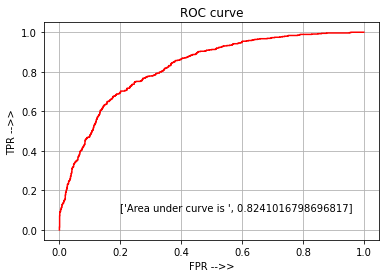

In [17]:
print("-->> Logistic Regression Algorithm")
print("**********************************")
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(train_c_x,train_c_y)
pred_logreg = logreg.predict(test_c_x)
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
print("-------------------------------------------------- ")
tab_logreg = confusion_matrix(test_c_y,pred_logreg)
cm_logreg = pd.DataFrame(tab_logreg, columns = ['benign','malignant'], index = ['benign','malignant'])
print(cm_logreg)
print("---------------------------------------------------")
acc_logreg = tab_logreg.diagonal().sum() * 100 / tab_logreg.sum()
print("Accuracy = ",acc_logreg)
from sklearn.metrics import recall_score, precision_score, f1_score
TPR_logreg = recall_score(test_c_y,pred_logreg)*100
print("TPR =", TPR_logreg)
FPR_logreg = tab_logreg[0][1] * 100 / tab_logreg[0].sum()
print("FPR = ",FPR_logreg)
precision_logreg = precision_score(test_c_y,pred_logreg)*100
print("precision = ",precision_logreg)
f_score_logreg = f1_score(test_c_y,pred_logreg)*100
print("F1-Score = ",f_score_logreg)
from sklearn.metrics import roc_auc_score, roc_curve
pred_pro_logreg = logreg.predict_proba(test_c_x)
AUROC_logreg = roc_auc_score(test_c_y, pred_pro_logreg[:,1])
print("AUROC = ", AUROC_logreg)
fpr_logreg,tpr_logreg,threshold_logreg = roc_curve(test_c_y, pred_pro_logreg[:,1])
import matplotlib.pylab  as plt
print("")
print("Area Under Receiver Operating Characteristic Curve [ AUROC ]")
print("")
plt.plot(fpr_logreg,tpr_logreg,color = 'r')
plt.xlabel("FPR -->>")
plt.ylabel("TPR -->>")
plt.title("ROC curve")
plt.grid()
plt.text(x = .2, y = .1, s = ["Area under curve is ",AUROC_logreg])
print("")
print("")
